In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import json
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sn
import pickle

import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

In [2]:
with open('characterInfoDict.json') as json_file:  
    info_dict = json.load(json_file, encoding="utf-8")

In [3]:
labels = [
    "philosopher's stone", 
    "chamber of secrets", 
    "prisoner of azkaban", 
    "goblet of fire", 
    "order of the phoenix", 
    "half-blood prince", 
    "deathly hallows 1", 
    "deathly hallows 2"
]

In [4]:
sorted_by_most_total_degrees = [(u'harry potter',
  [(0, 49), (1, 58), (2, 52), (3, 40), (4, 51), (5, 60), (6, 88), (7, 62)]),
 (u'ron weasley',
  [(0, 40), (1, 58), (2, 44), (3, 34), (4, 33), (5, 43), (6, 69), (7, 60)]),
 (u'hermione granger',
  [(0, 40), (1, 54), (2, 44), (3, 28), (4, 33), (5, 42), (6, 76), (7, 58)]),
 (u'albus dumbledore',
  [(0, 35), (1, 33), (2, 33), (3, 33), (4, 39), (5, 42), (6, 53)]),
 (u'lord voldemort',
  [(1, 31), (2, 19), (3, 21), (4, 36), (5, 29), (6, 48), (7, 52)]),
 (u'fred weasley',
  [(0, 29), (1, 25), (2, 23), (3, 24), (4, 23), (5, 25), (6, 29), (7, 36)]),
 (u'severus snape',
  [(0, 35), (1, 23), (2, 29), (3, 18), (4, 21), (5, 32), (7, 40)]),
 (u'neville longbottom',
  [(0, 28), (1, 24), (2, 29), (3, 21), (4, 20), (5, 22), (7, 47)]),
 (u'ginny weasley', [(1, 38), (4, 25), (5, 37), (6, 35), (7, 45)]),
 (u'george weasley',
  [(0, 29), (1, 29), (2, 22), (3, 23), (4, 24), (5, 21), (6, 30)]),
 (u'rubeus hagrid', [(0, 36), (1, 35), (2, 32), (3, 21), (6, 29)]),
 (u'minerva mcgonagall', [(0, 31), (1, 34), (2, 22), (3, 20), (7, 39)]),
 (u'seamus finnigan', [(0, 28), (1, 25), (2, 20), (3, 18), (7, 46)]),
 (u'draco malfoy', [(0, 31), (1, 29), (2, 24), (3, 17), (5, 33)]),
 (u'luna lovegood', [(4, 20), (5, 21), (6, 33), (7, 45)]),
 (u'arthur weasley', [(1, 21), (4, 19), (6, 38), (7, 37)]),
 (u'remus lupin', [(2, 30), (6, 33), (7, 45)]),
 (u'argus filch', [(0, 23), (2, 21), (3, 17), (7, 33)]),
 (u'bellatrix lestrange', [(5, 25), (7, 40)]),
 (u'sirius black', [(2, 39), (4, 25)]),
 (u'dean thomas', [(5, 24), (7, 40)]),
 (u'bill weasley', [(6, 31), (7, 33)]),
 (u'mad-eye moody', [(3, 30), (6, 33)]),
 (u'cedric diggory', [(3, 28), (4, 19)]),
 (u'wormtail', [(2, 24), (3, 19)]),
 (u'horace slughorn', [(5, 43)]),
 (u'katie bell', [(0, 19), (5, 24)]),
 (u'vincent crabbe', [(0, 19), (2, 21)]),
 (u'gregory goyle', [(0, 19), (2, 20)]),
 (u'filius flitwick', [(7, 35)]),
 (u'colin creevey', [(1, 35)]),
 (u'kingsley shacklebolt', [(7, 34)]),
 (u'gilderoy lockhart', [(1, 33)]),
 (u'mrs. norris', [(7, 32)]),
 (u'quirinus quirrell', [(0, 31)]),
 (u'bathilda bagshot', [(6, 31)]),
 (u'xenophilius lovegood', [(6, 30)]),
 (u'cornelius fudge', [(4, 30)]),
 (u'dolores umbridge', [(4, 30)]),
 (u'viktor krum', [(3, 29)]),
 (u'justin finch-fletchley', [(1, 28)]),
 (u'fleur delacour', [(6, 28)]),
 (u'nymphadora tonks', [(6, 27)]),
 (u'errol', [(1, 26)]),
 (u'corban yaxley', [(6, 25)]),
 (u'rita skeeter', [(6, 25)]),
 (u'barty crouch', [(3, 24)]),
 (u'cormac mclaggen', [(5, 24)]),
 (u'lucius malfoy', [(1, 23)]),
 (u'lavender brown', [(5, 22)]),
 (u'crookshanks', [(2, 20)]),
 (u'percy weasley', [(0, 20)]),
 (u'fenrir greyback', [(5, 19)]),
 (u'blaise zabini', [(5, 19)]),
 (u'susan bones', [(0, 19)]),
 (u'sir nicholas', [(0, 19)]),
 (u'igor karkaroff', [(3, 17)]),
 (u'cho chang', [(4, 17)]),
 (u'molly weasley', [(4, 16)]),
 (u'sybill trelawney', [(4, 15)]),
 (u'michael corner', [(4, 14)])]

In [5]:
degrees_by_movie = defaultdict(list,
            {u'albus dumbledore': [(0, 35),
              (1, 33),
              (2, 33),
              (3, 33),
              (4, 39),
              (5, 42),
              (6, 53)],
             u'argus filch': [(0, 23), (2, 21), (3, 17), (7, 33)],
             u'arthur weasley': [(1, 21), (4, 19), (6, 38), (7, 37)],
             u'barty crouch': [(3, 24)],
             u'bathilda bagshot': [(6, 31)],
             u'bellatrix lestrange': [(5, 25), (7, 40)],
             u'bill weasley': [(6, 31), (7, 33)],
             u'blaise zabini': [(5, 19)],
             u'cedric diggory': [(3, 28), (4, 19)],
             u'cho chang': [(4, 17)],
             u'colin creevey': [(1, 35)],
             u'corban yaxley': [(6, 25)],
             u'cormac mclaggen': [(5, 24)],
             u'cornelius fudge': [(4, 30)],
             u'crookshanks': [(2, 20)],
             u'dean thomas': [(5, 24), (7, 40)],
             u'dolores umbridge': [(4, 30)],
             u'draco malfoy': [(0, 31), (1, 29), (2, 24), (3, 17), (5, 33)],
             u'errol': [(1, 26)],
             u'fenrir greyback': [(5, 19)],
             u'filius flitwick': [(7, 35)],
             u'fleur delacour': [(6, 28)],
             u'fred weasley': [(0, 29),
              (1, 25),
              (2, 23),
              (3, 24),
              (4, 23),
              (5, 25),
              (6, 29),
              (7, 36)],
             u'george weasley': [(0, 29),
              (1, 29),
              (2, 22),
              (3, 23),
              (4, 24),
              (5, 21),
              (6, 30)],
             u'gilderoy lockhart': [(1, 33)],
             u'ginny weasley': [(1, 38), (4, 25), (5, 37), (6, 35), (7, 45)],
             u'gregory goyle': [(0, 19), (2, 20)],
             u'harry potter': [(0, 49),
              (1, 58),
              (2, 52),
              (3, 40),
              (4, 51),
              (5, 60),
              (6, 88),
              (7, 62)],
             u'hermione granger': [(0, 40),
              (1, 54),
              (2, 44),
              (3, 28),
              (4, 33),
              (5, 42),
              (6, 76),
              (7, 58)],
             u'horace slughorn': [(5, 43)],
             u'igor karkaroff': [(3, 17)],
             u'justin finch-fletchley': [(1, 28)],
             u'katie bell': [(0, 19), (5, 24)],
             u'kingsley shacklebolt': [(7, 34)],
             u'lavender brown': [(5, 22)],
             u'lord voldemort': [(1, 31),
              (2, 19),
              (3, 21),
              (4, 36),
              (5, 29),
              (6, 48),
              (7, 52)],
             u'lucius malfoy': [(1, 23)],
             u'luna lovegood': [(4, 20), (5, 21), (6, 33), (7, 45)],
             u'mad-eye moody': [(3, 30), (6, 33)],
             u'michael corner': [(4, 14)],
             u'minerva mcgonagall': [(0, 31),
              (1, 34),
              (2, 22),
              (3, 20),
              (7, 39)],
             u'molly weasley': [(4, 16)],
             u'mrs. norris': [(7, 32)],
             u'neville longbottom': [(0, 28),
              (1, 24),
              (2, 29),
              (3, 21),
              (4, 20),
              (5, 22),
              (7, 47)],
             u'nymphadora tonks': [(6, 27)],
             u'percy weasley': [(0, 20)],
             u'quirinus quirrell': [(0, 31)],
             u'remus lupin': [(2, 30), (6, 33), (7, 45)],
             u'rita skeeter': [(6, 25)],
             u'ron weasley': [(0, 40),
              (1, 58),
              (2, 44),
              (3, 34),
              (4, 33),
              (5, 43),
              (6, 69),
              (7, 60)],
             u'rubeus hagrid': [(0, 36), (1, 35), (2, 32), (3, 21), (6, 29)],
             u'seamus finnigan': [(0, 28), (1, 25), (2, 20), (3, 18), (7, 46)],
             u'severus snape': [(0, 35),
              (1, 23),
              (2, 29),
              (3, 18),
              (4, 21),
              (5, 32),
              (7, 40)],
             u'sir nicholas': [(0, 19)],
             u'sirius black': [(2, 39), (4, 25)],
             u'susan bones': [(0, 19)],
             u'sybill trelawney': [(4, 15)],
             u'viktor krum': [(3, 29)],
             u'vincent crabbe': [(0, 19), (2, 21)],
             u'wormtail': [(2, 24), (3, 19)],
             u'xenophilius lovegood': [(6, 30)]})

In [6]:
gryffindor = "#CC2A36"
slytherin = "#05ac72"
hufflepuff = "#ffa351"
ravenclaw = "#456789" # "#012345"
muggle = "#cccccc"
default = "#4e0333"
order= "#fa5b0b"
deatheater = "#4da04e"

line_color = "#0f0f0f"
label_color = "#3b3b3b"
tick_label_color = "#474747"

In [7]:
def generate_node_color_good_evil(character, info_dict):
    try:
        house = info_dict[character]["house"]
        blood = info_dict[character]["blood"]
        loyalty = info_dict[character]["loyalty"]
        if "order of the phoenix" in loyalty or "dumbledore's army" in loyalty:
             return order
        elif "death eaters" in loyalty or "lord voldemort" in loyalty:
             return slytherin
        else:
            return default
    except:
        return "#00DFF7"

In [8]:
def generate_node_color(character, info_dict):
    try:
        house = info_dict[character]["house"]
        blood = info_dict[character]["blood"]
        loyalty = info_dict[character]["loyalty"]
        if house == "gryffindor":
            return gryffindor
        elif house == "slytherin":
             return slytherin
        elif house == "hufflepuff":
             return hufflepuff
        elif house == "ravenclaw":
             return ravenclaw
        elif blood == "muggle":
            return muggle
        else:
            return default
    except:
        return "#00DFF7"

In [9]:
plt.style.use('visual-data.mplstyle')

font = {'family' : 'sans-serif',
        'sans-serif' : 'Roboto',
        'size'   : 14}
matplotlib.rc('font', **font)

In [10]:
def calc_step_size(diff):
    step = 20
    if diff == 10:
        step = 5
    if diff <= 40:
        step = 10
    return step

In [11]:
from __future__ import division

In [12]:
def display_degree_series(x, y, title, color, labels, save=False, file_name="image"):
    offsets = {
        100:3,
        80:2.4,
        60:1.8,
        40:1.4,
        20:0.9
    }
    
    y_max = ((max(y) + 19) // 20) * 20 # find the next multiple of 20 >= max of y
    #y_max = ((max(y) + 10) // 10) * 10 # find the next multiple of 10 >= max of y
    y_min = ((min(y)-1) // 10)*10
    diff = y_max - y_min
    #offset = float((y_max - y_min)/20.) if diff > 10 else 0.5
    step = 20 if diff >= 40  else 10
    lable_rotation = -45
    fig = plt.figure()#(figsize=(8,20))
    axis = plt.gca()
    axis.tick_params(direction='inout')
    axis.set_xticklabels(labels, rotation=lable_rotation, ha='left')
    #axis.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.scatter(x,y, color=color, alpha=1)
    plt.plot(x,y, color=color,alpha=0.3)
    plt.title(title)
    plt.xlim(-1,len(labels))
    #plt.ylim(0,y_max)
    plt.yticks(range(0,y_max+step, step if y_max > 20 else 5))
    plt.xticks(range(len(labels)), labels, rotation=lable_rotation)
    plt.ylabel("Degree")
    print(y_max)
    for i,j in zip(x,y):
        plt.text(x=i,y=j+offsets[y_max], s=j, ha='center', fontdict={'color':  '#737373','weight': 'normal','size': 16})

    plt.show()

100


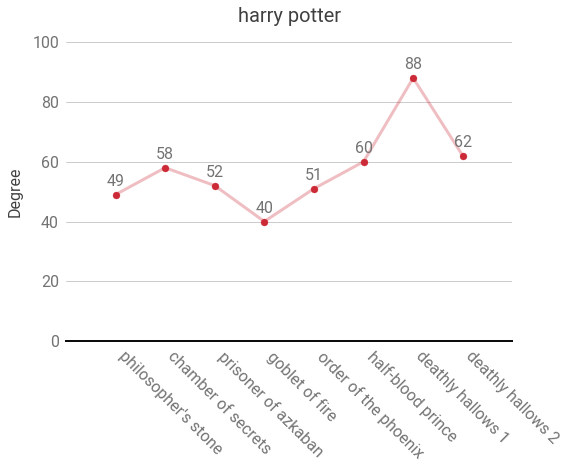

80


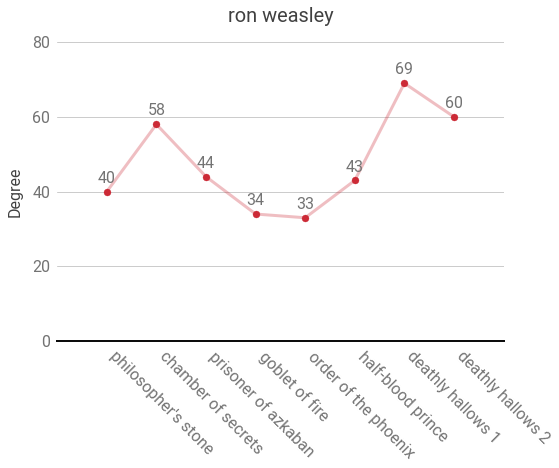

80


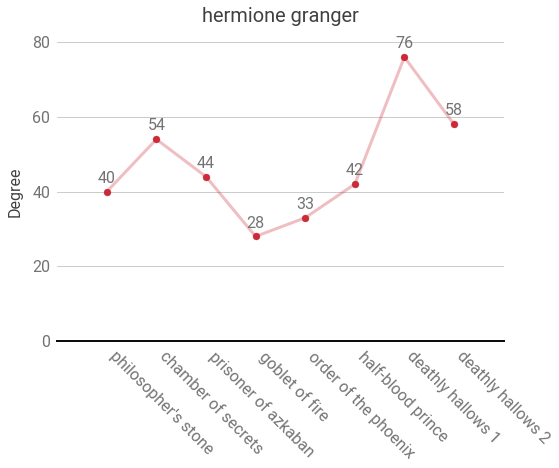

60


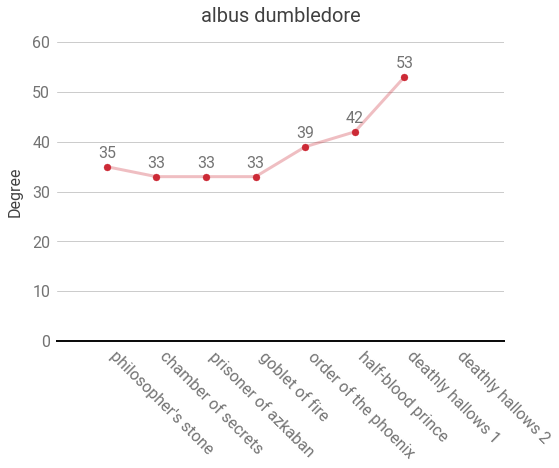

60


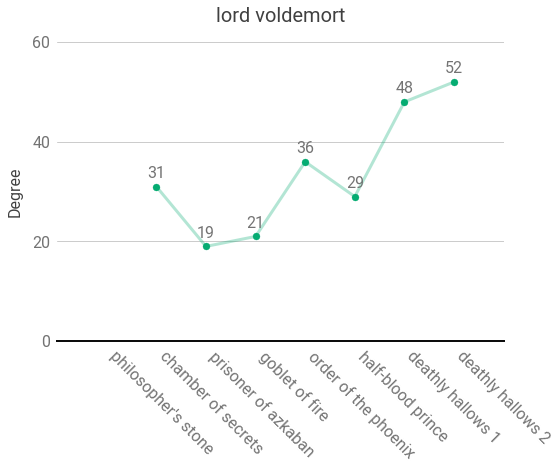

40


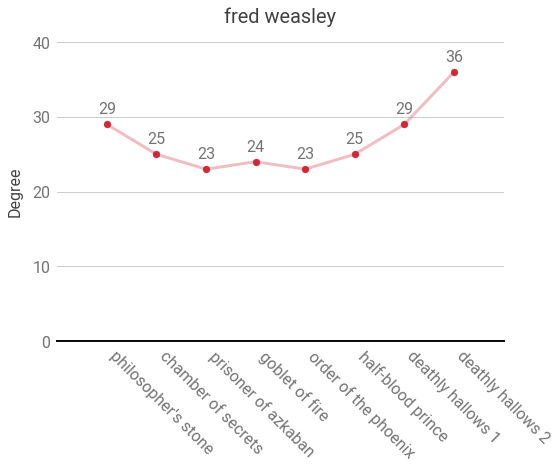

40


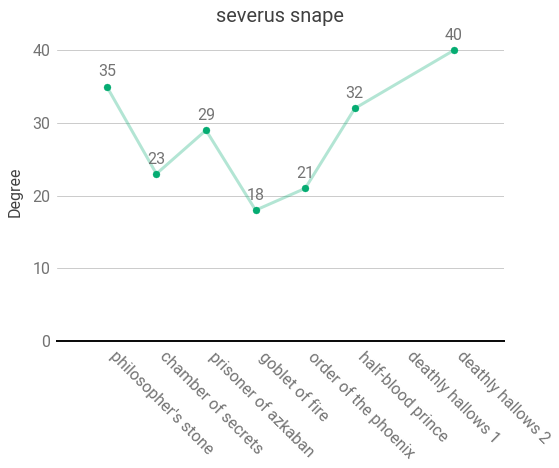

60


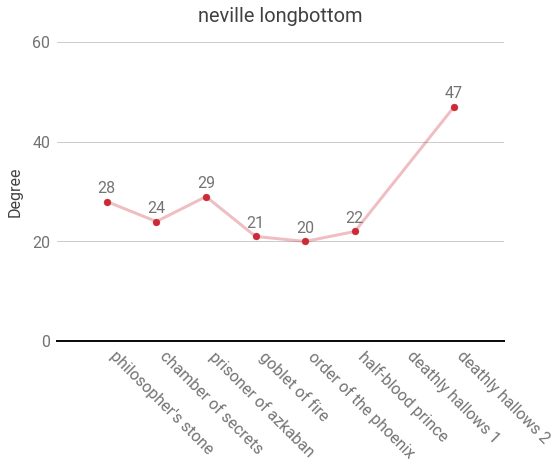

60


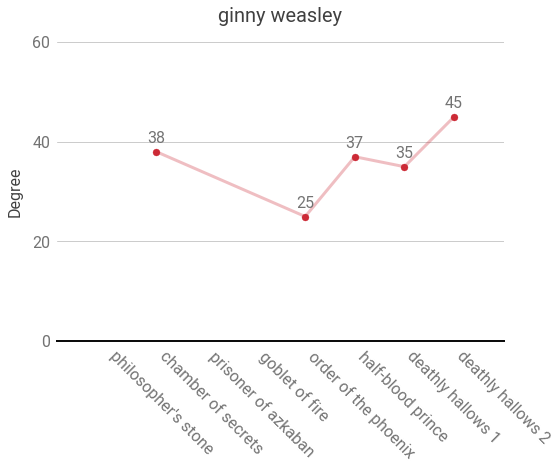

40


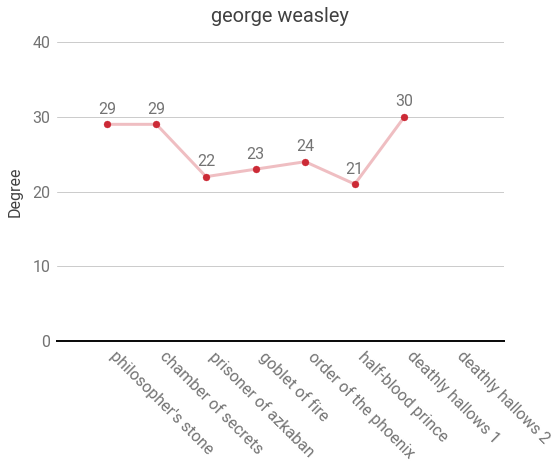

40


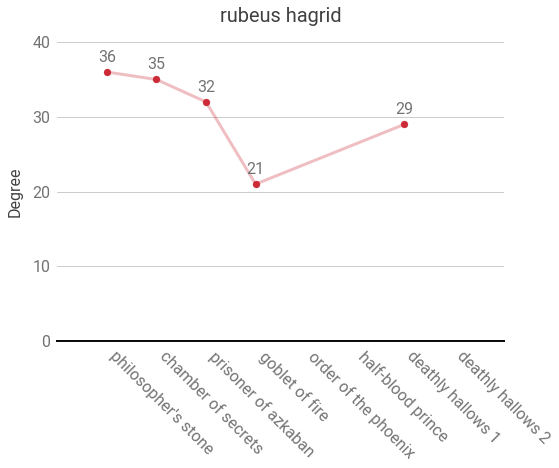

40


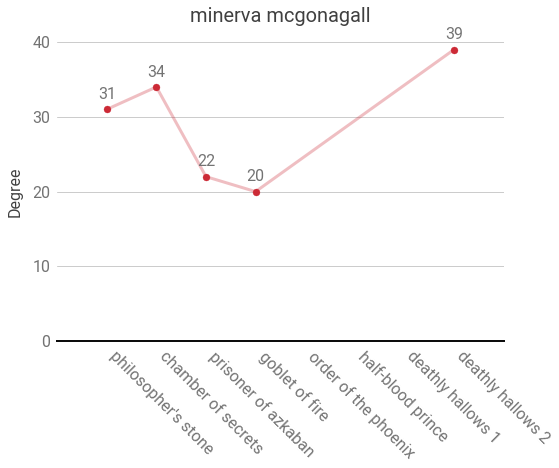

60


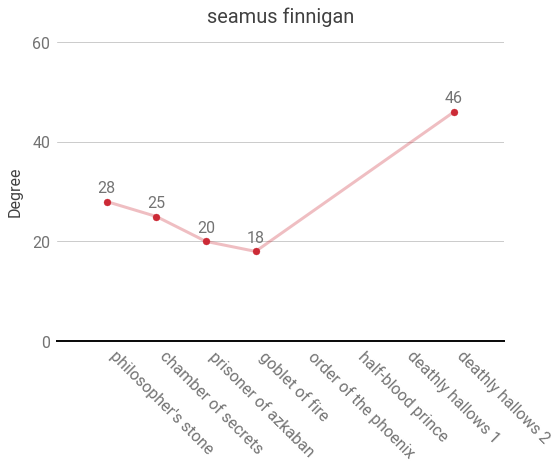

40


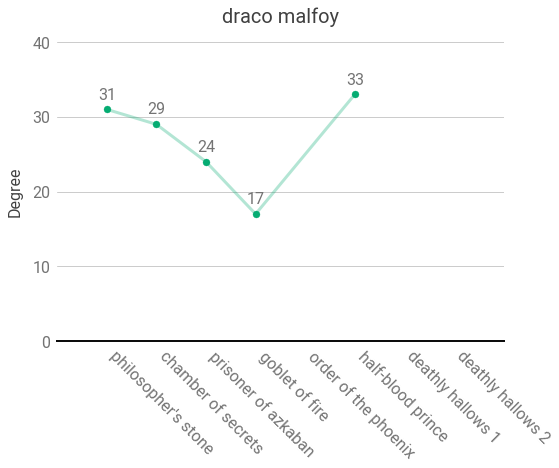

60


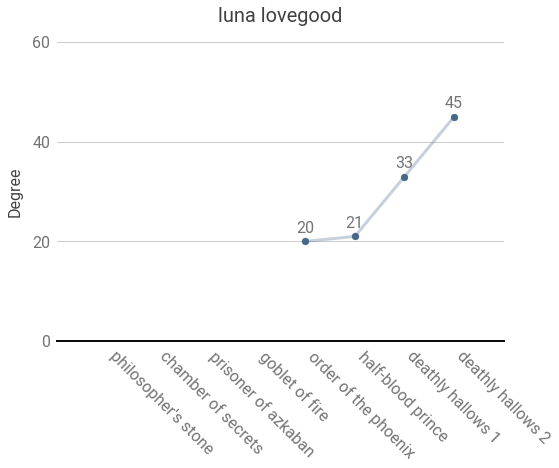

40


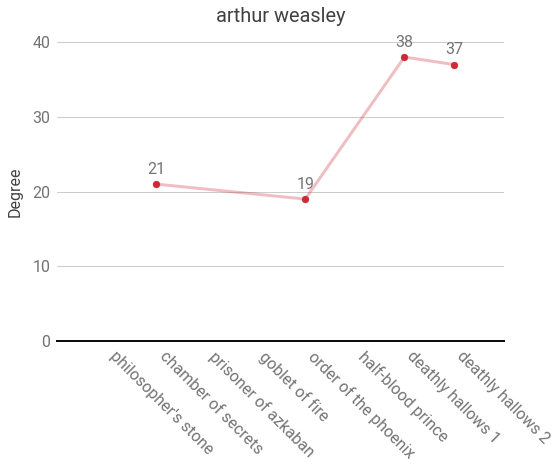

60


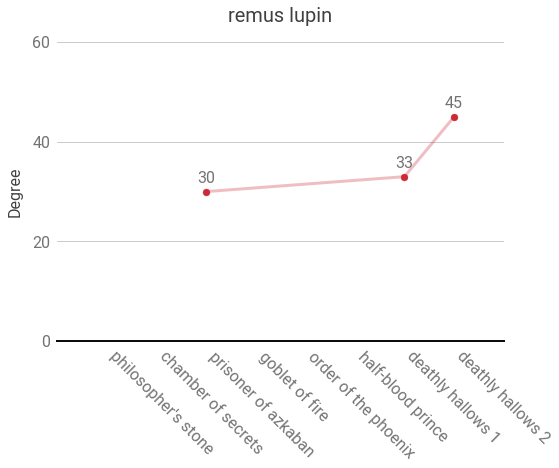

40


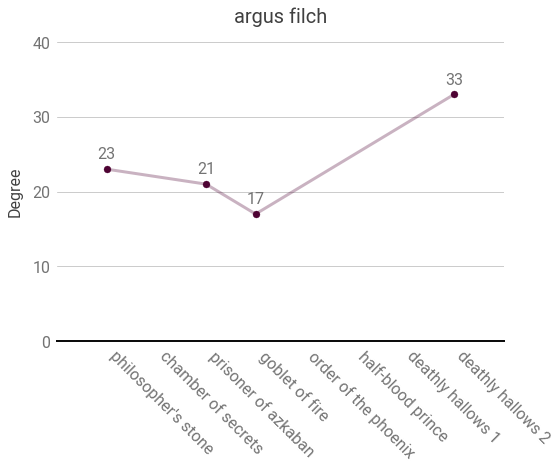

40


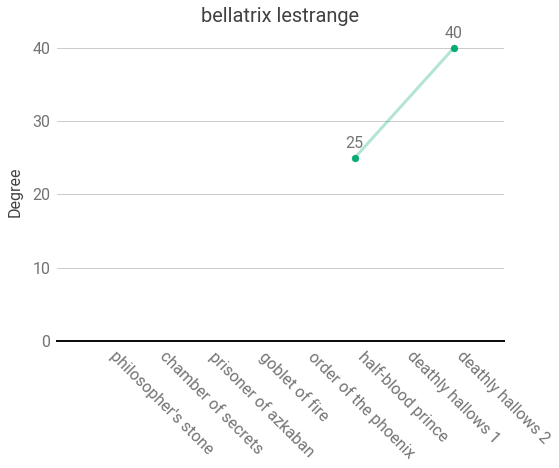

40


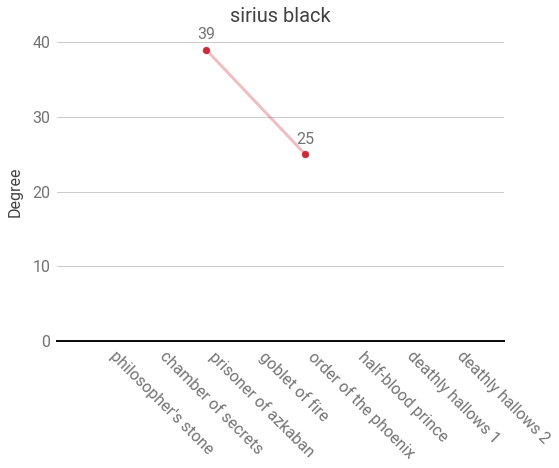

40


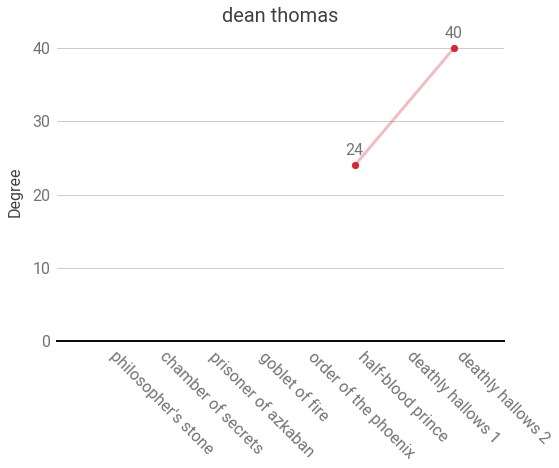

40


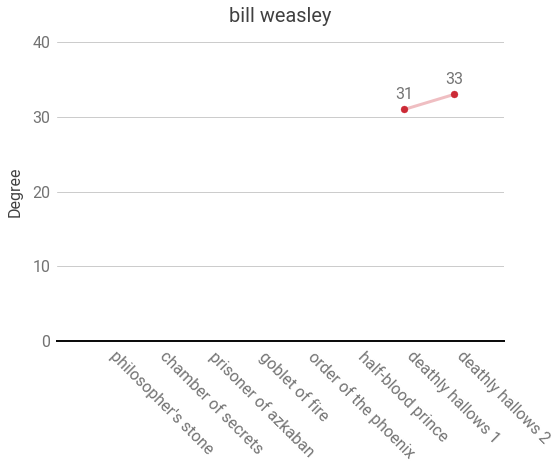

40


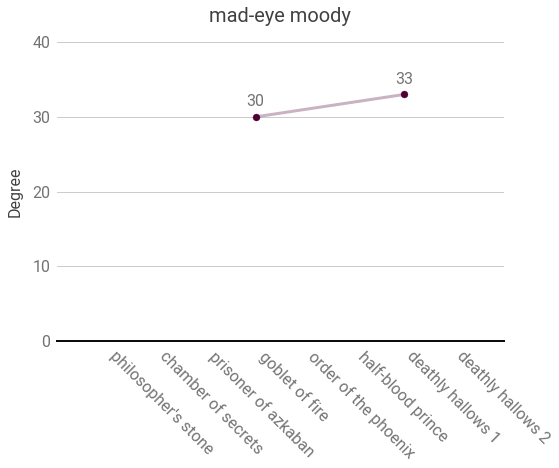

40


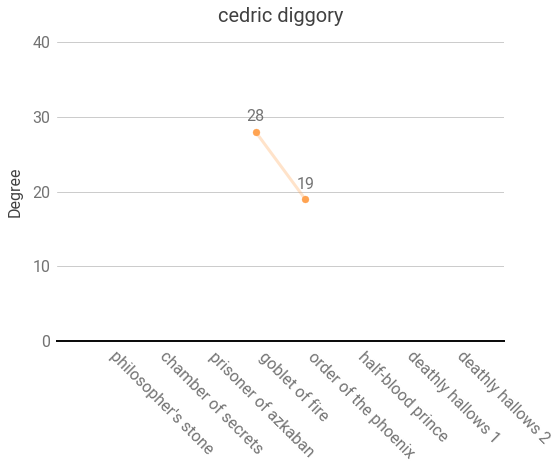

40


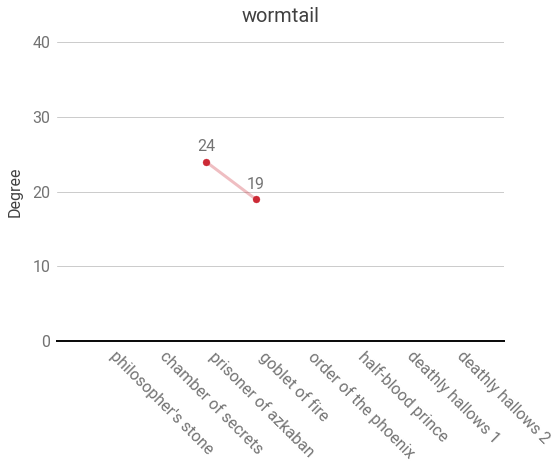

60


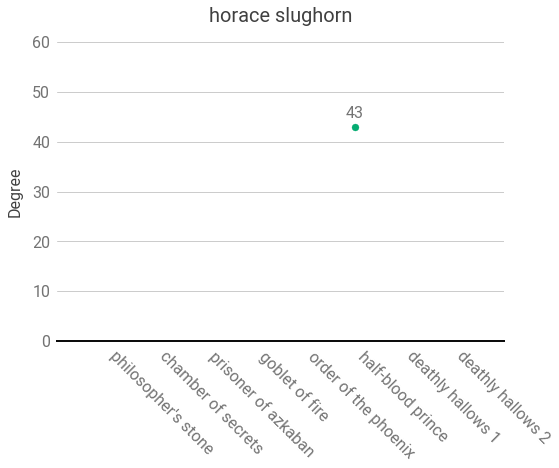

40


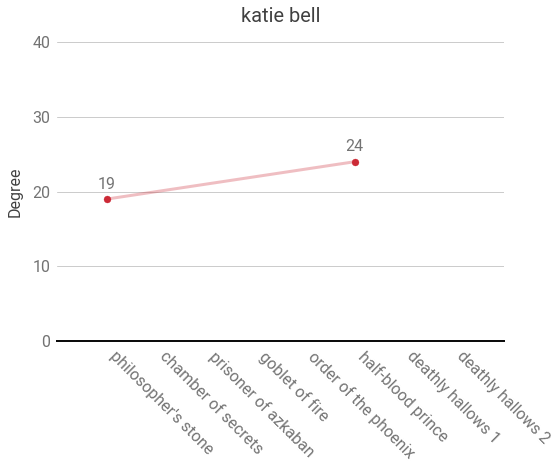

40


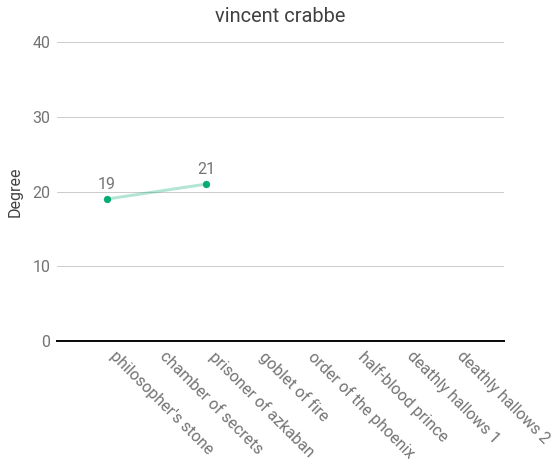

20


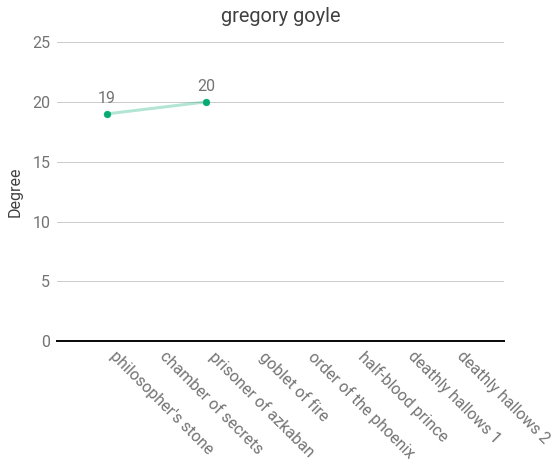

40


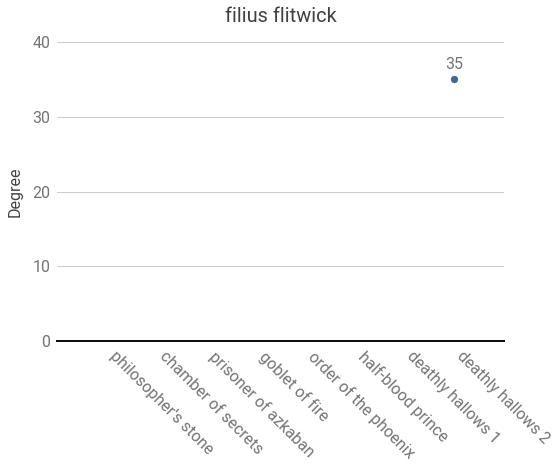

40


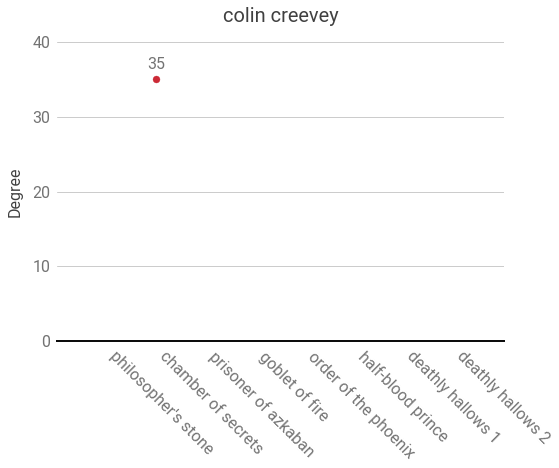

40


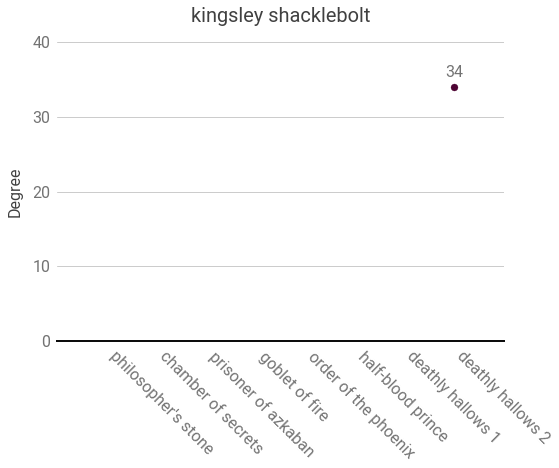

40


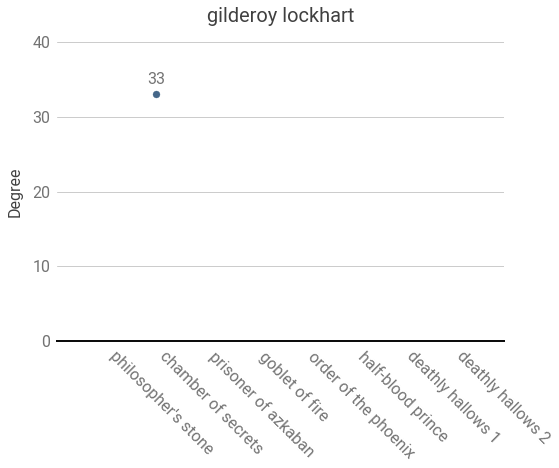

40


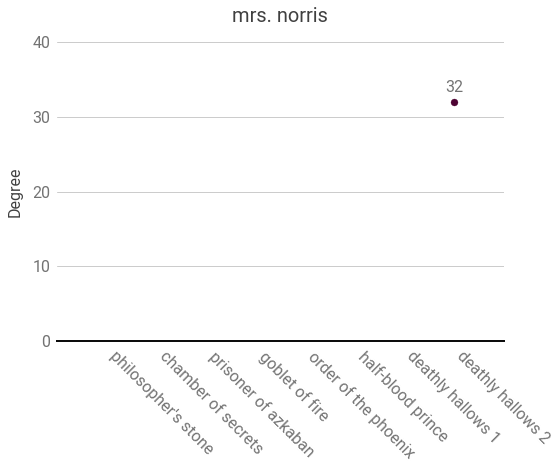

40


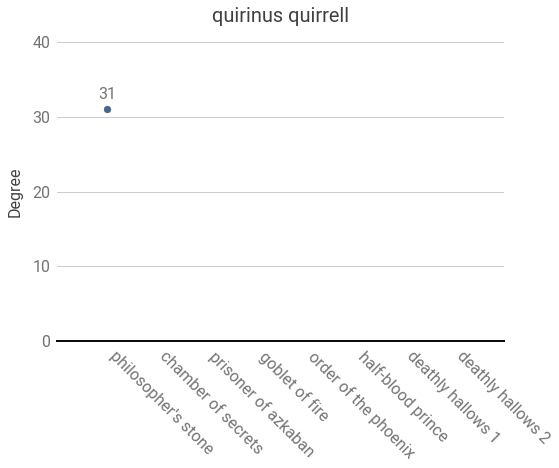

40


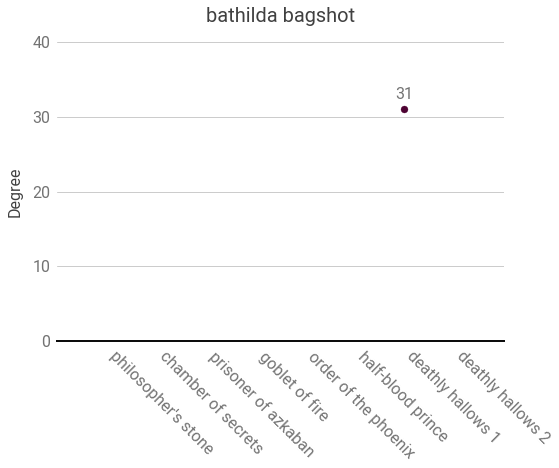

40


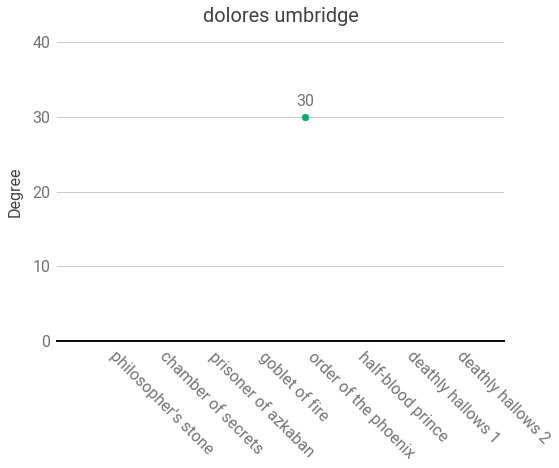

40


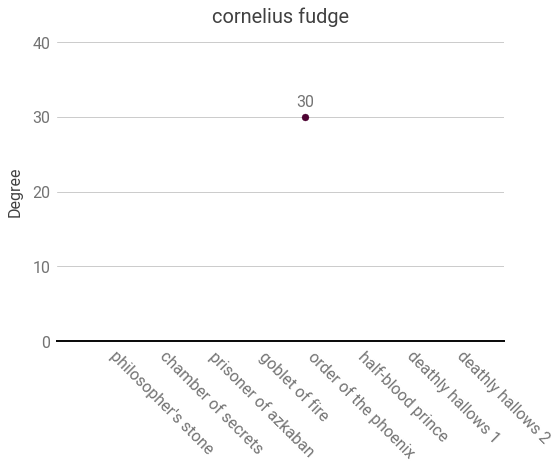

40


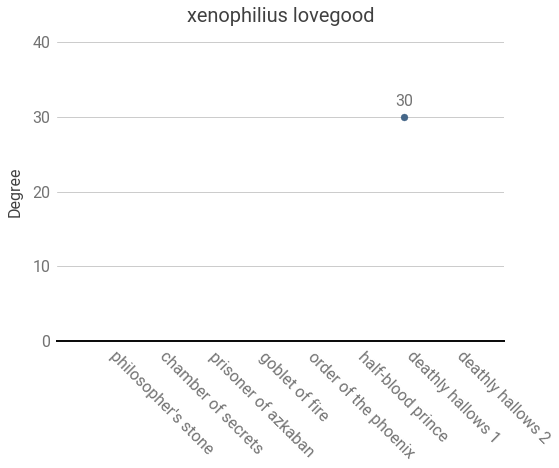

40


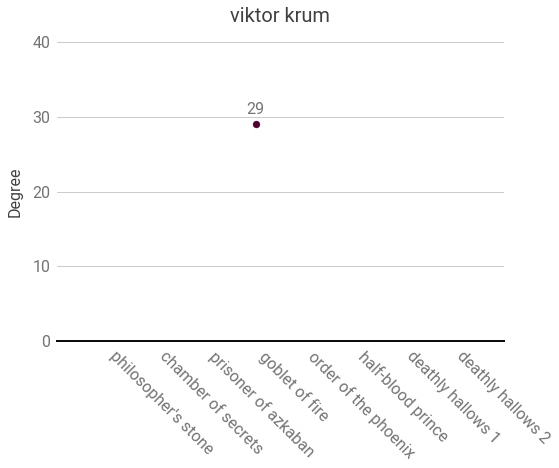

40


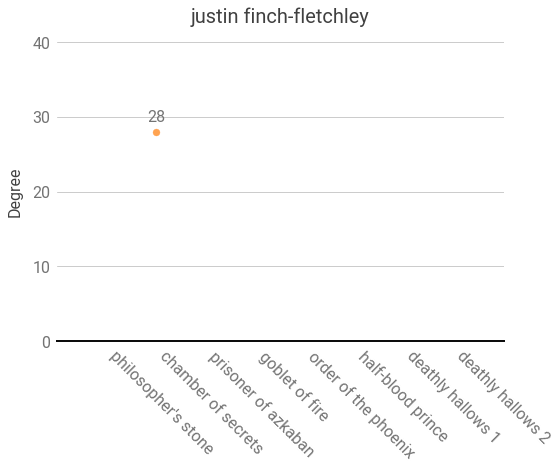

40


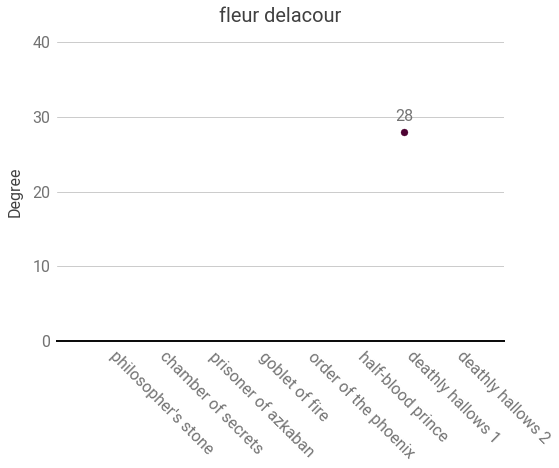

40


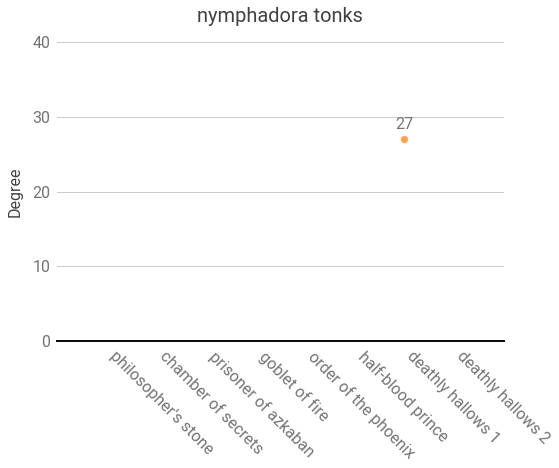

40


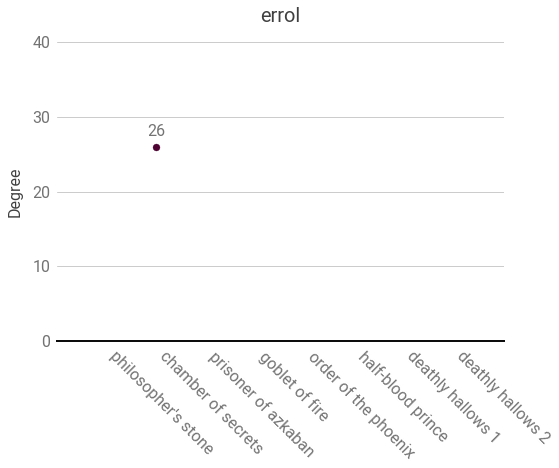

40


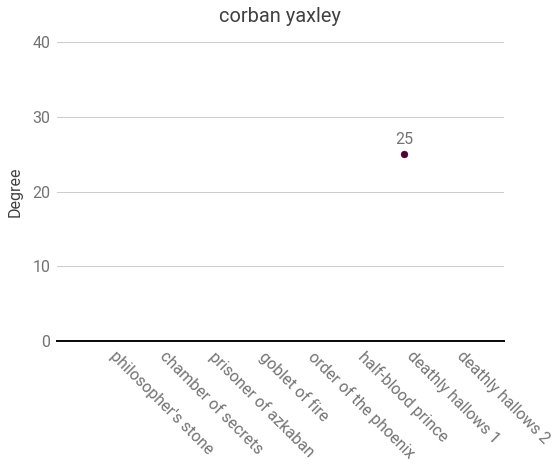

40


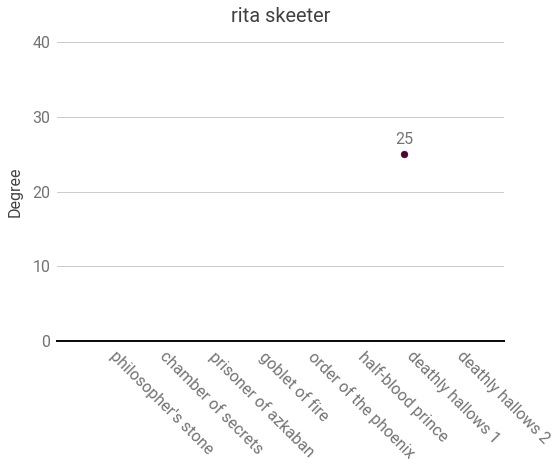

40


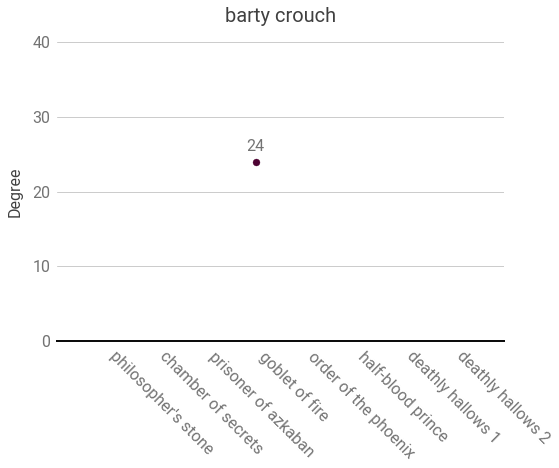

40


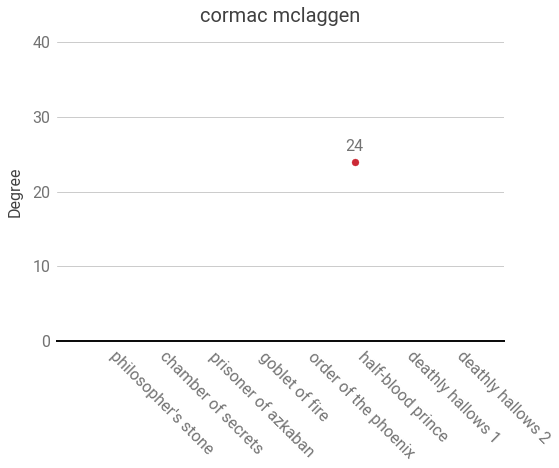

40


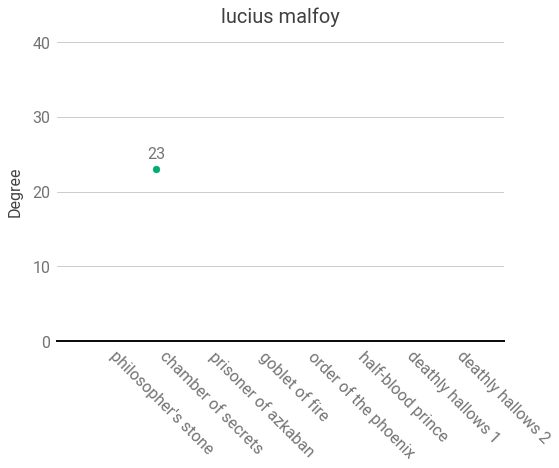

40


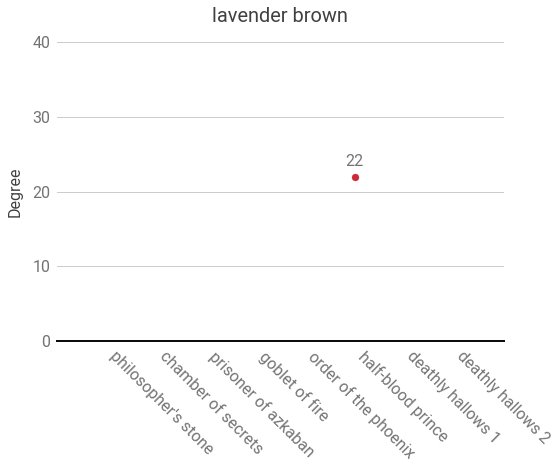

20


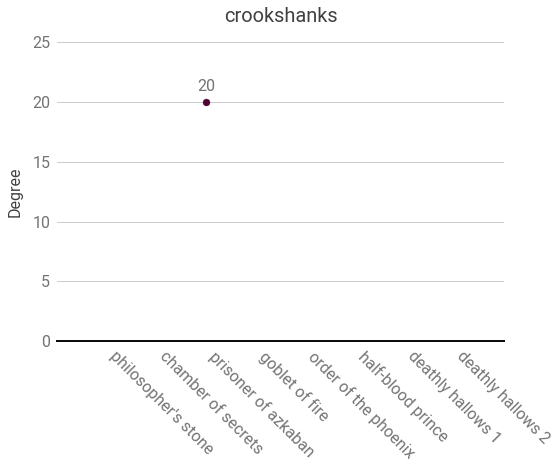

20


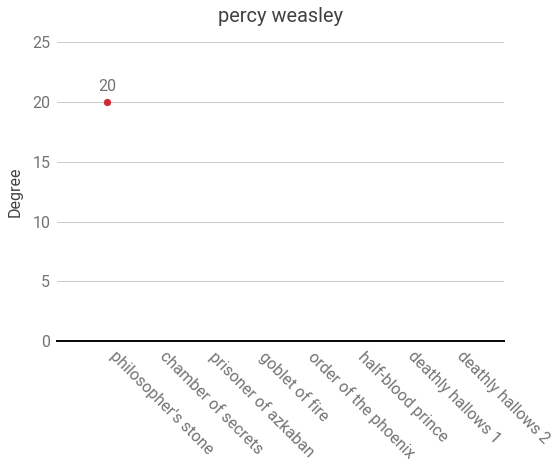

20


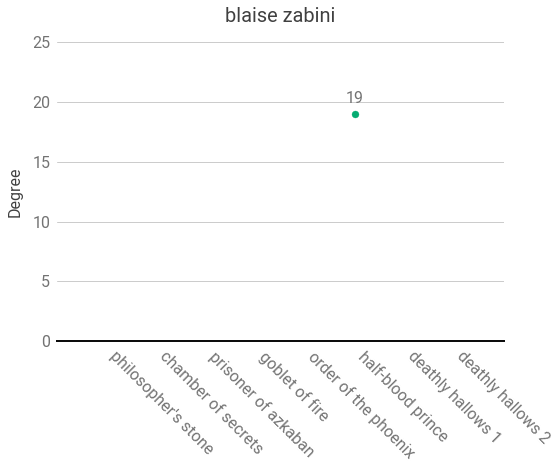

20


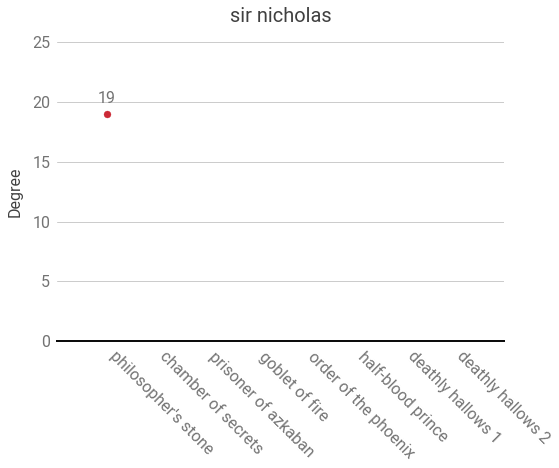

20


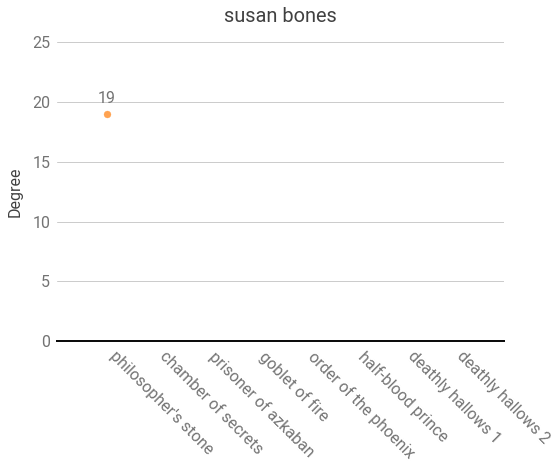

20


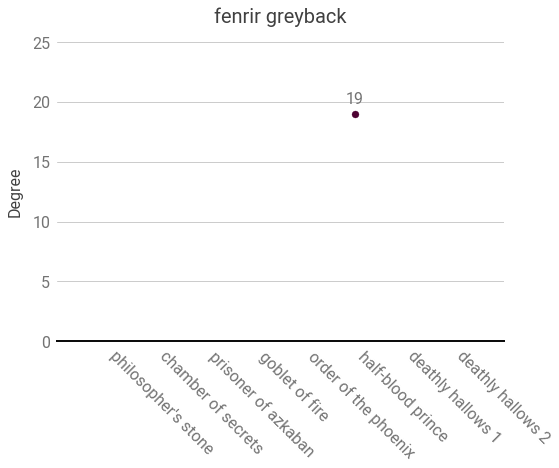

20


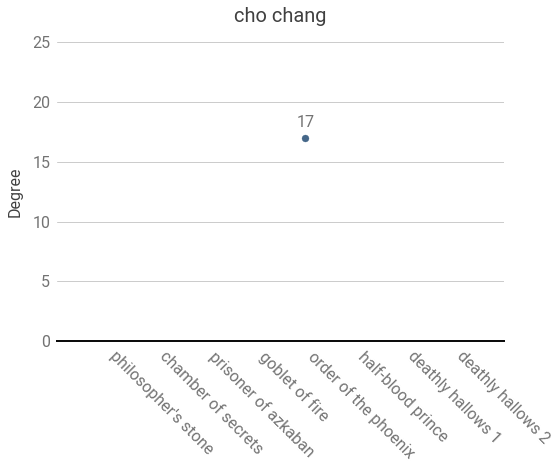

20


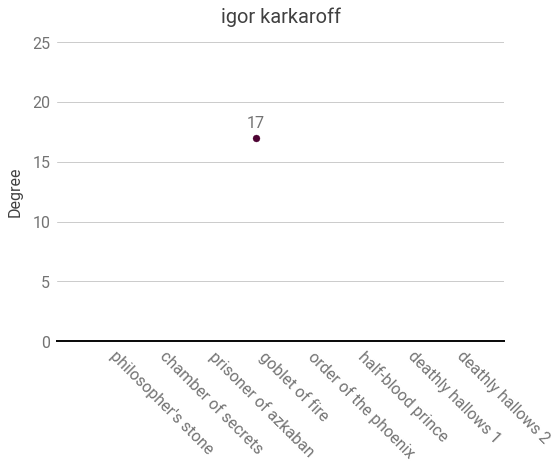

20


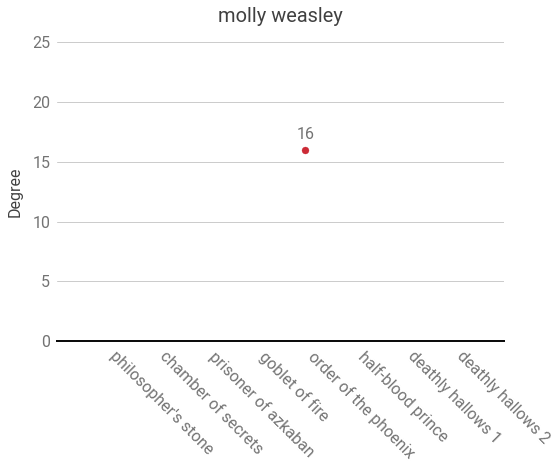

20


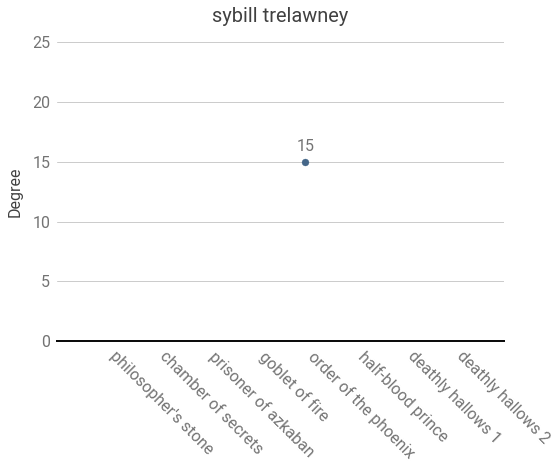

20


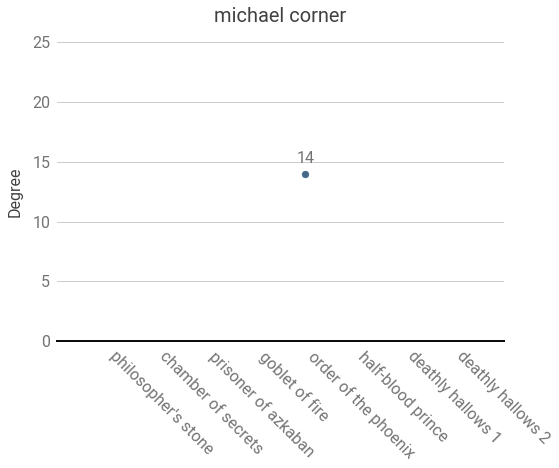

In [13]:
sorted_by_most_total_degrees = sorted(degrees_by_movie.iteritems(), key=lambda kv: sum(zip(*kv[1])[1]), reverse=True)
for index, (node, degrees) in enumerate(sorted_by_most_total_degrees):
    x,y = zip(*degrees)
    color = generate_node_color(node, info_dict)
    name = "degree" + str(index+1)
    display_degree_series(x, y, node, color, labels, save=False, file_name=name)
    

In [14]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

u'C:\\WINDOWS\\Fonts\\Roboto-Regular.ttf'

In [15]:
nodes = [50, 62, 54, 42, 54, 64, 89, 71]
edges = [445, 583, 451, 351, 373, 512, 822, 874]

In [16]:
def plot_networks_over_time(nodes, edges, lables, save=False, file_name="plot"):
    lable_rotation = -45
    fig = plt.figure()

    x = range(len(labels))
    y1 = nodes
    y2 = edges

    fig, ax1 = plt.subplots()
    #plt.ylim(30,140)

    color = gryffindor
    ax1.set_ylabel('Nodes', color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(direction='inout')
    ax1.set_xticklabels(labels, rotation=lable_rotation, ha='left')
    ax1.set_yticks(range(40, 100, 10))
    plt.xticks(x, labels,rotation=lable_rotation)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = ravenclaw
    ax2.set_ylabel('Edges', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y2, color=color)
    ax2.grid(None)
    ax2.set_yticks(range(300, 1100, 150))
    print(ax1.get_yticks())

    plt.xticks(rotation=lable_rotation)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.savefig("../plots/" + file_name + ".png", format="PNG", transparent=True,  bbox_inches = "tight")

    plt.show()

[40 50 60 70 80 90]


<Figure size 576x396 with 0 Axes>

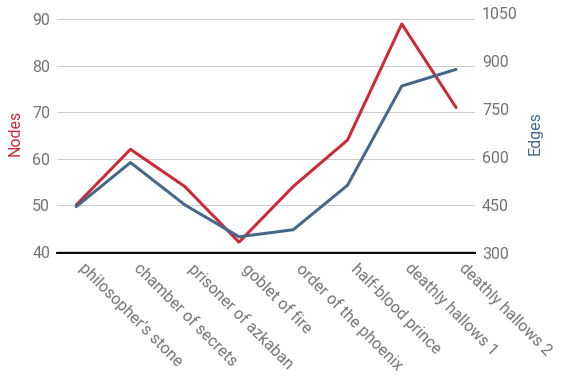

In [17]:
plot_networks_over_time(nodes, edges, labels, save=False, file_name="degreeSeries")

In [18]:
DG = nx.read_gpickle("graph.gpickle")

In [19]:
def display_degree_destribution(degrees, save=False, file_name="degreeDist"):
    degree_sequence = sorted([d for n, d in degrees], reverse=True)
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig = plt.figure(1)
    plt.bar(deg, cnt, width=0.80, color=ravenclaw)
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes')
    plt.tight_layout()
    if save:
        plt.savefig("../plots/distributions/" + file_name + ".png", format="PNG", transparent=True,  bbox_inches = "tight")

    fig = plt.figure(2)
    plt.loglog(deg, cnt, marker ="o", lw=0, color=ravenclaw)
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes')
    plt.tight_layout()
    if save:
        plt.savefig("../plots/distributions/" + file_name + "LogLog" + ".png", format="PNG", transparent=True,  bbox_inches = "tight")

    plt.show()

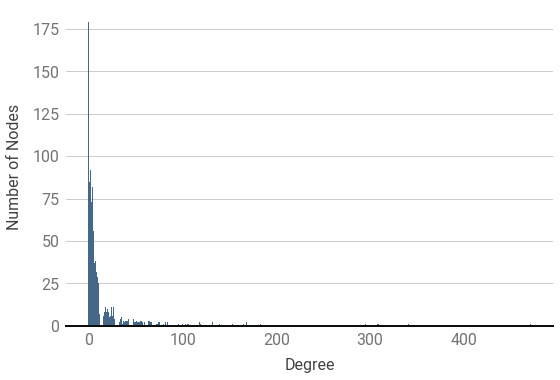

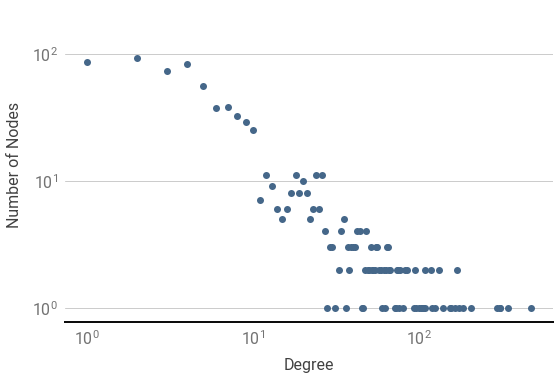

In [20]:
display_degree_destribution(DG.degree(), save=False, file_name="wikiDist")

In [21]:
def display_in_out_destribution(in_degrees, out_degrees, save=False, file_name="inOutDist"):
    fig = plt.figure(3)
    plt.scatter(in_degrees,out_degrees, color= ravenclaw)
    plt.xlabel("In degree")
    plt.ylabel('Out degree')
    if save:
        plt.savefig("../plots/distributions/" + file_name + ".png", format="PNG", transparent=True,  bbox_inches = "tight")
    plt.show()

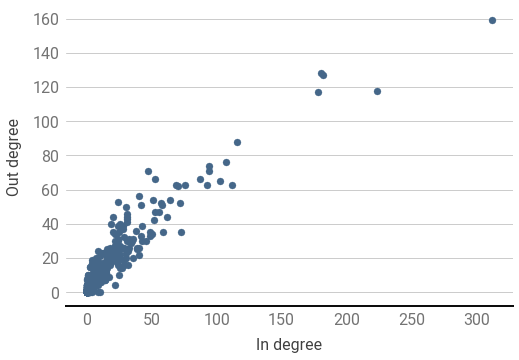

In [22]:
in_values_sorted_by_name = [int(x[1]) for x in sorted(list(DG.in_degree()))]
out_values_sorted_by_name = [int(x[1]) for x in sorted(list(DG.out_degree()))]

display_in_out_destribution(in_values_sorted_by_name, out_values_sorted_by_name, save=False, file_name="inOutDist")

In [23]:
matrix = [[33, 27, 7, 4],
 [15, 6, 4, 2],
 [3, 7, 1, 1],
 [3, 2, 0, 0],
 [5, 3, 1, 0],
 [0, 0, 1, 0],
 [3, 9, 2, 0],
 [13, 6, 3, 0],
 [11, 3, 1, 0]]

partitions = {u'aberforth dumbledore': 1,
 u'albus dumbledore': 2,
 u'albus severus potter': 3,
 u'alecto carrow': 0,
 u'amycus carrow': 0,
 u'argus filch': 0,
 u'ariana dumbledore': 1,
 u'arthur weasley': 0,
 u'bellatrix lestrange': 1,
 u'bill weasley': 0,
 u'blaise zabini': 0,
 u'bogrod': 1,
 u'cho chang': 0,
 u'corban yaxley': 1,
 u'dean thomas': 0,
 u'dobby': 1,
 u'draco malfoy': 1,
 u'fenrir greyback': 1,
 u'filius flitwick': 0,
 u'fleur delacour': 0,
 u'fred weasley': 0,
 u'garrick ollivander': 1,
 u'george weasley': 0,
 u'ginny weasley': 0,
 u'gregory goyle': 0,
 u'griphook': 1,
 u'harry potter': 1,
 u'helena ravenclaw': 1,
 u'helga hufflepuff': 1,
 u'hepzibah smith': 1,
 u'hermione granger': 1,
 u'hugo granger-weasley': 3,
 u'james potter': 2,
 u'james potter ii': 3,
 u'katie bell': 0,
 u'kingsley shacklebolt': 0,
 u'lavender brown': 0,
 u'lily j. potter': 2,
 u'lord voldemort': 1,
 u'lucius malfoy': 1,
 u'luna lovegood': 0,
 u'minerva mcgonagall': 0,
 u'molly weasley': 0,
 u'mrs. norris': 0,
 u'mundungus fletcher': 1,
 u'nagini': 1,
 u'narcissa malfoy': 1,
 u'neville longbottom': 0,
 u'nymphadora tonks': 0,
 u'oliver wood': 0,
 u'padma patil': 0,
 u'pansy parkinson': 0,
 u'percy weasley': 0,
 u'petunia dursley': 2,
 u'pius thicknesse': 1,
 u'pomona sprout': 0,
 u'poppy pomfrey': 0,
 u'quirinus quirrell': 2,
 u'remus lupin': 0,
 u'ron weasley': 1,
 u'rose granger-weasley': 3,
 u'rowena ravenclaw': 1,
 u'rubeus hagrid': 1,
 u'salazar slytherin': 1,
 u'scabior': 1,
 u'seamus finnigan': 0,
 u'severus snape': 2,
 u'sirius black': 2,
 u'sybill trelawney': 0,
 u'teddy lupin': 0,
 u'wormtail': 1}

In [24]:
def display_community_heatmap(matrix, save=False, file_name="heatmap", color_map="PuBu"):
    df_cm = pd.DataFrame(matrix, index = [i for i in ["total size", "gryffindor",  "slytherin", "hufflepuff", "ravenclaw", "muggle", "death eater", "order of the phoenix", "dumbledore's army"]],
                  columns = [i for i in range(len(set(partitions.values())))])
    plt.figure()#figsize = (30,2))
    plt.tight_layout()
    axis = sn.heatmap(df_cm, annot=True, cmap=color_map, annot_kws={"rotation":0},cbar=True, fmt="d")
    cbar = axis.collections[0].colorbar
    #cbar.ax.yaxis.set_tick_params(color=disp_color)
    cbar.ax.tick_params(axis='y')
    cbar.set_label("Characters/Category")
    axis.set_xlabel("Community Id")
    if save:
        plt.savefig("../plots/networks/" + file_name + ".png", format="PNG", transparent=True,  bbox_inches = "tight")
    plt.show()

In [25]:
HpScl = LinearSegmentedColormap.from_list("DaBlGr", ["#0d0d0d",ravenclaw], N=256, gamma=1.0)

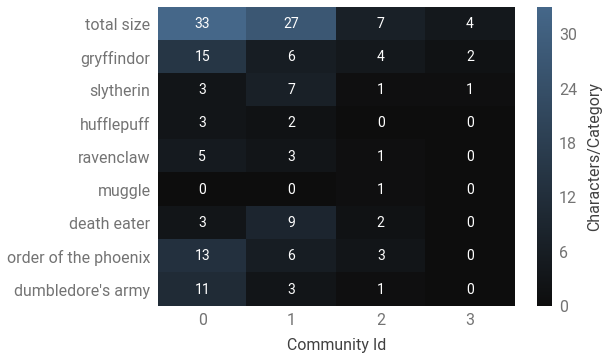

In [26]:
display_community_heatmap(matrix, color_map=HpScl, save=False, file_name="heatmap_name")

In [27]:
def display_sentiment(x,y,labels, lable_locations, title="sent", save_plot=False):
    lable_rotation = -45
    fig = plt.figure(figsize=(20,8))
    axis = plt.gca()
    axis.tick_params(direction='inout')
    axis.set_xticklabels(labels, rotation=lable_rotation, ha='left')
    plt.plot(x,y, color=ravenclaw, linewidth=1)
    for book in lable_locations:
        plt.axvline(x=book, color="#404040")
    plt.xticks(lable_locations, labels,rotation=lable_rotation)
    plt.ylabel("Average Sentiment")
    plt.tight_layout()
    
    if save_plot:
        plt.savefig("../plots/sentimants/" + title + ".png", format="PNG", transparent=True, bbox_inches="tight")
    plt.show()

In [28]:
book_names = [
    "philosopher's stone", 
    "chamber of secrets", 
    "prisoner of azkaban", 
    "goblet of fire", 
    "order of the phoenix", 
    "half-blood prince", 
    "deathly hallows", 
]

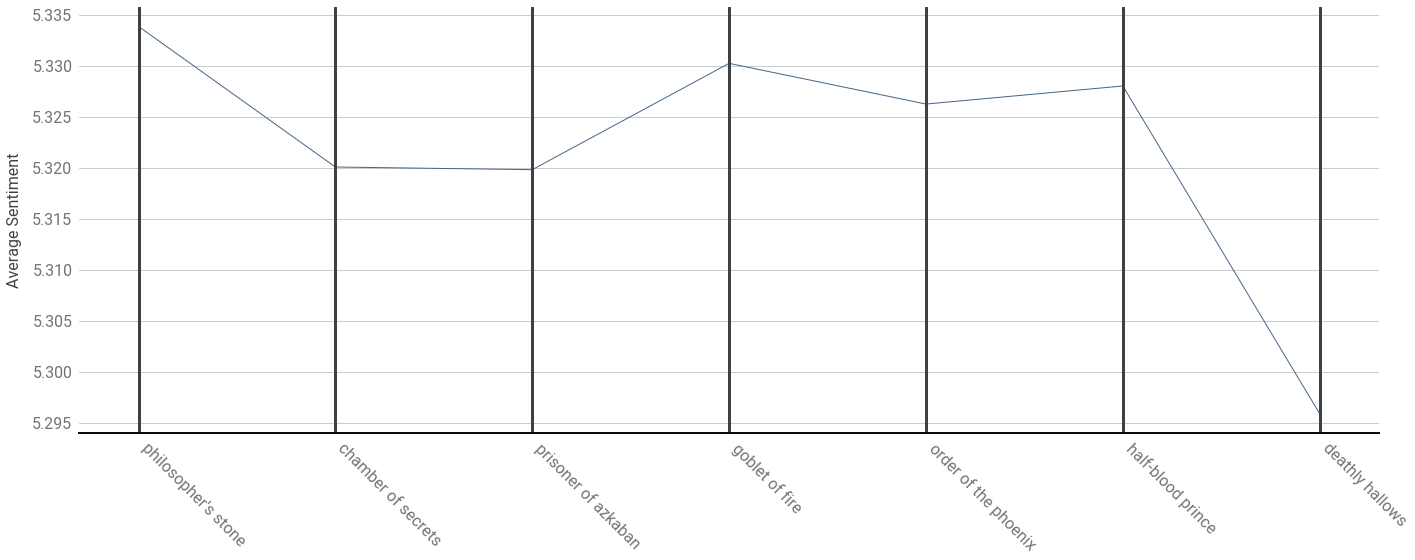

In [29]:
book_sentiments = [
    5.33385911817,
    5.32007207254,
    5.31981087567,
    5.33023696409,
    5.32624551042,
    5.3280163771,
    5.29587962731
]
x_2 = range(len(book_sentiments))
display_sentiment(x_2,book_sentiments, labels=book_names, lable_locations=x_2, title="sentBook")

In [30]:
y = pickle.load(open("sent.pkl", "r"))
x_v = range(len(y))
book_start = [0, 69, 214, 372, 442, 529, 682, 849]
book_names = [
    "philosopher's stone", 
    "chamber of secrets", 
    "prisoner of azkaban", 
    "goblet of fire", 
    "order of the phoenix", 
    "half-blood prince", 
    "deathly hallows 1", 
    "deathly hallows 2"   
]

In [33]:
def display_sentiment_scene(x,y,labels, lable_locations, save_plot = False):
    lable_rotation = -45
    fig = plt.figure(figsize=(20,8))
    axis = plt.gca()
    axis.tick_params(direction='inout')
    axis.set_xticklabels(labels, rotation=lable_rotation, ha='left')
    
    plt.plot(x,y, color=ravenclaw, linewidth=1)
    for book in lable_locations:
        plt.axvline(x=book, color="#404040")
    plt.ylim(4.8,5.1)
    plt.xticks(lable_locations, labels,rotation=lable_rotation)
    plt.ylabel("Average Sentiment")
    plt.tight_layout()
    if save_plot:
        plt.savefig("../plots/sentimants/sentScenes.png", format="PNG", transparent=True, bbox_inches="tight")
    plt.show

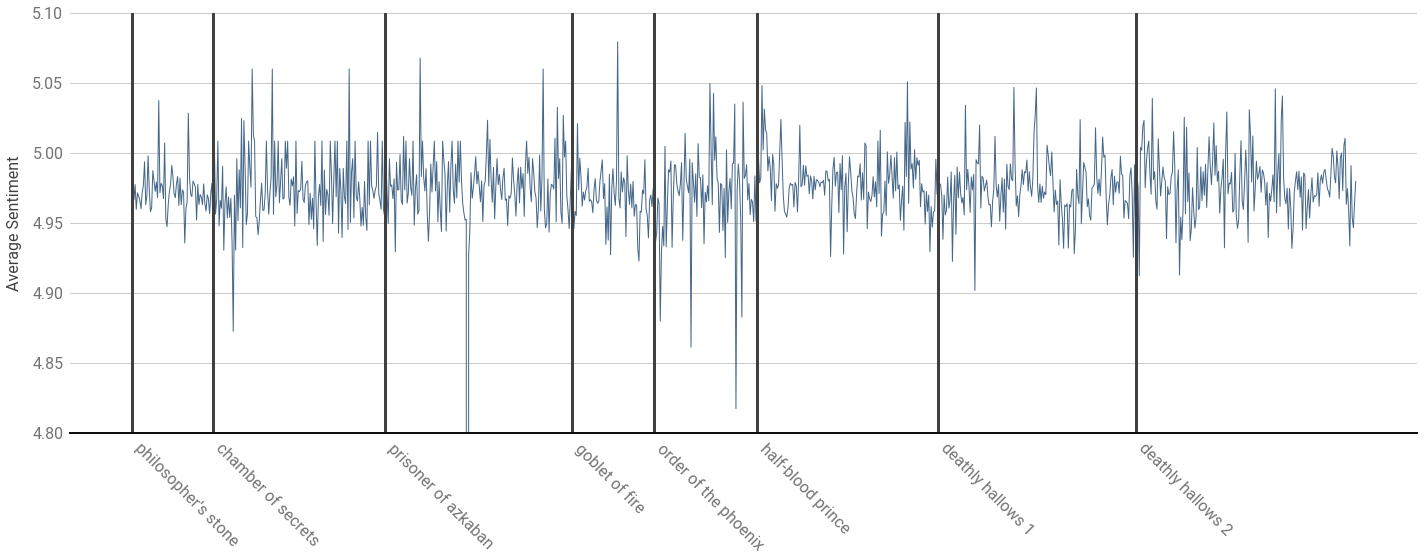

In [34]:
display_sentiment_scene(x_v,y,labels=book_names, lable_locations=book_start)